In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def W_matrix(Nvirt,T_theta_ratio,gamma,fp0,delay=0):
    W = np.zeros((Nvirt,Nvirt))
    #Memory effect
    for i in range(Nvirt):
        W[i,-1] = np.exp(-(i+1)/T_theta_ratio)
    #Feedback
    for i in range(Nvirt):
        for j in range(i+1-delay):
            W[i,j] = W[i,j]+(1-np.exp(-1./T_theta_ratio))*fp0*gamma*np.exp(-(i-j-delay)/T_theta_ratio)
    return W

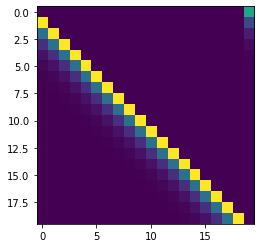

In [99]:
W = W_matrix(20,1,0.99,1,1)
for k in range(1,2):
    plt.imshow(np.linalg.matrix_power(W,k))
    plt.show()

In [86]:
def W_matrix_with_delay(Nvirt,T_theta_ratio,gamma,fp0,delay):
    W = np.zeros((2*Nvirt,2*Nvirt))
    #Identity matrix
    W[:Nvirt,Nvirt:2*Nvirt] = np.eye(Nvirt)
    #W matrix
    W[Nvirt:2*Nvirt,Nvirt:2*Nvirt] = W_matrix(Nvirt,T_theta_ratio,gamma,fp0,delay=delay)
    #W_tilde matrix
    W_tilde = np.zeros((Nvirt,Nvirt))
    W_tilde[0,Nvirt-1] = (1-np.exp(-1./T_theta_ratio))*fp0*gamma
    W[Nvirt:2*Nvirt,:Nvirt] = W_tilde
    
    return W

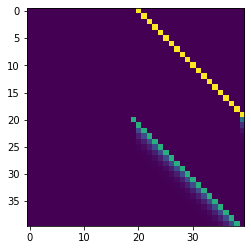

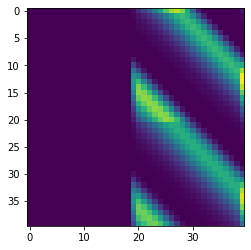

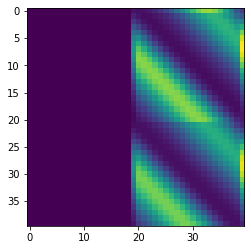

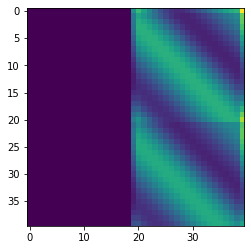

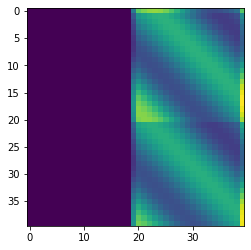

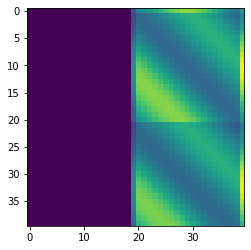

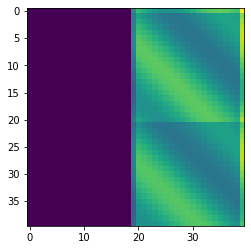

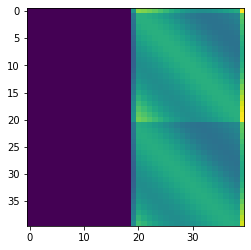

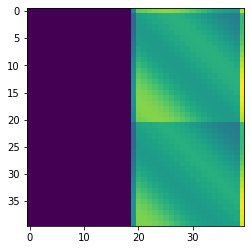

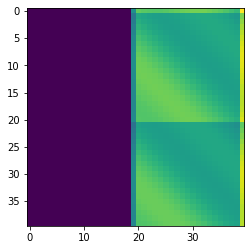

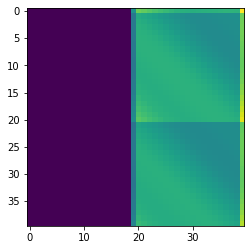

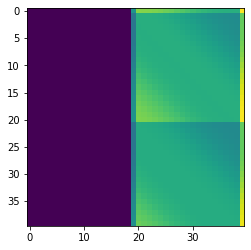

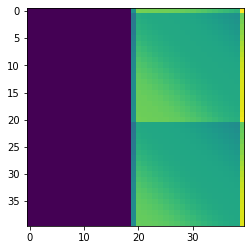

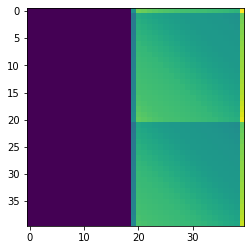

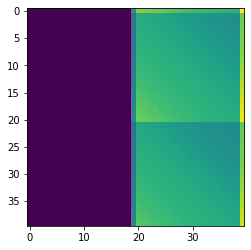

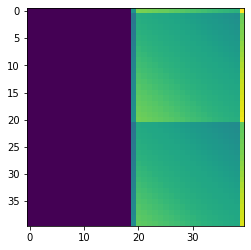

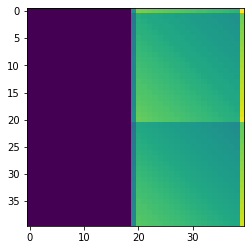

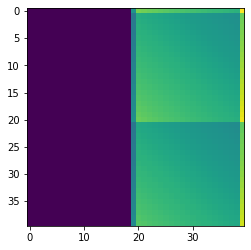

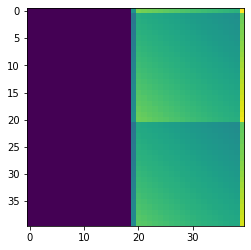

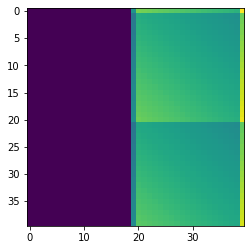

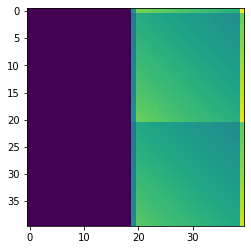

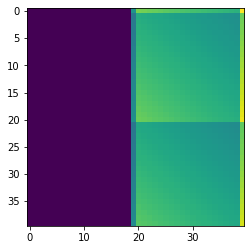

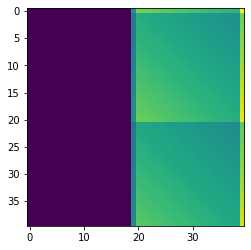

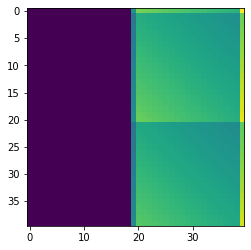

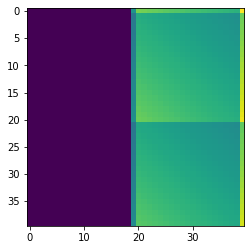

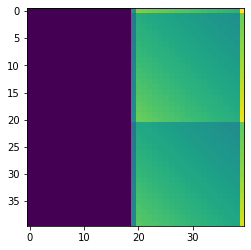

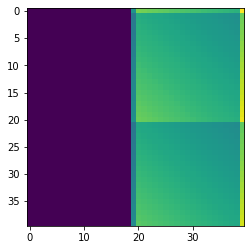

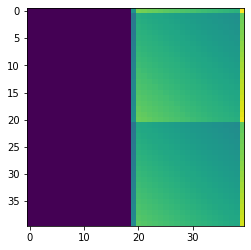

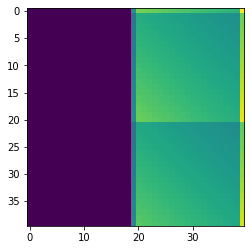

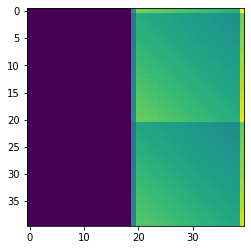

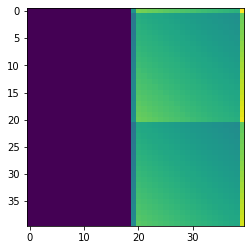

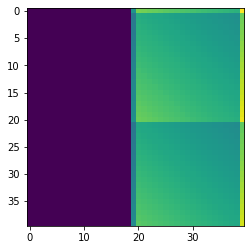

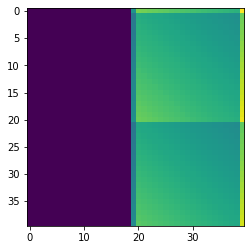

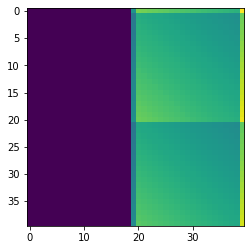

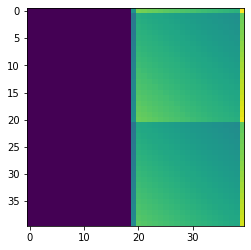

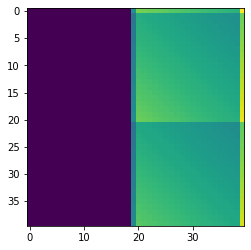

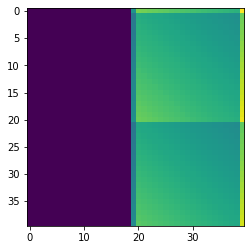

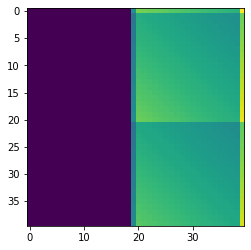

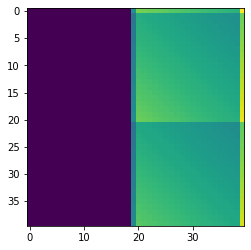

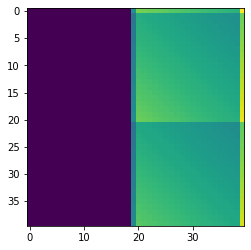

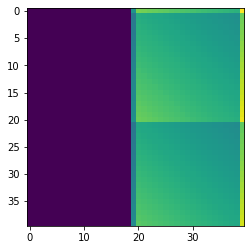

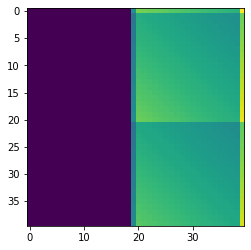

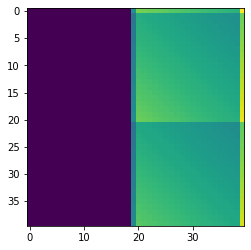

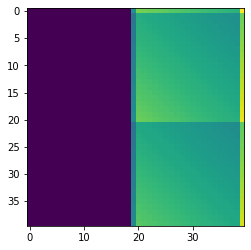

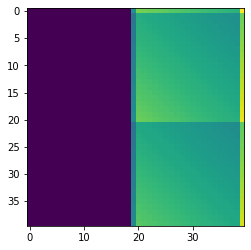

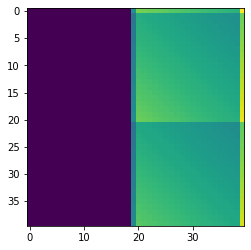

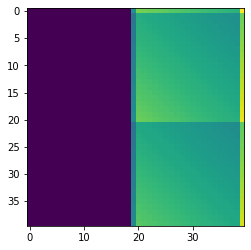

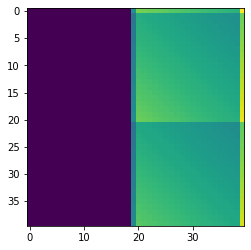

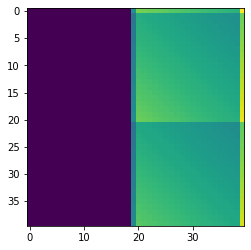

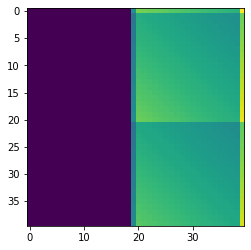

In [98]:
W = W_matrix_with_delay(20,1,0.99,1,1)
for k in range(1,500,10):
    plt.imshow(np.linalg.matrix_power(W,k))
    plt.show()